# 1. BTC/USD Dataset (Data split 7:3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 23ms/step - loss: 0.0527
Epoch 2/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0109
Epoch 3/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0021
Epoch 4/100
20/20 [==============================] - 0s 23ms/step - loss: 6.7396e-04
Epoch 5/100
20/20 [==============================] - 0s 23ms/step - loss: 6.0777e-04
Epoch 6/100
20/20 [==============================] - 1s 25ms/step - loss: 5.7644e-04
Epoch 7/100
20/20 [==============================] - 0s 23ms/step - loss: 5.4570e-04
Epoch 8/100
20/20 [==============================] - 0s 22ms/step - loss: 5.3804e-04
Epoch 9/100
20/20 [==============================] - 0s 22ms/step - loss: 5.2155e-04
Epoch 10/100
20/20 [==============================] - 0s 23ms/step - loss: 5.1789e-04
Epoch 11/100
20/20 [==============================] - 0s 22ms/step - loss: 4.9239e-04
Epoch 12/100
20/20 [==============================] - 0s 23ms/step - loss: 

In [10]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 7ms/step


In [11]:
y_pred=scaler.inverse_transform(y_pred)

In [12]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 1.8954378573751411
RMSE: 1172.7131925797635
MAE: 761.5989226973683


In [14]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

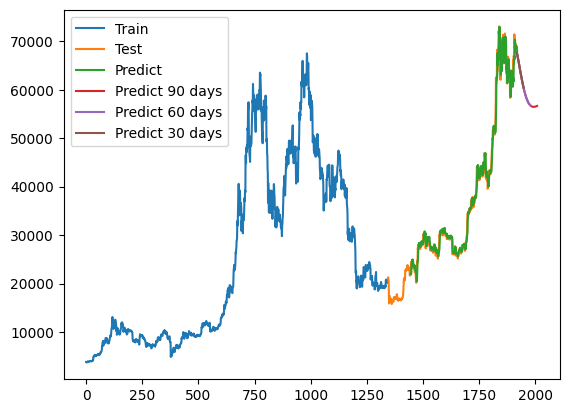

In [15]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 2. ETH/USD Dataset (Data split 7:3)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [23]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [24]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [25]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [26]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [27]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
model = Sequential()
model.add(GRU(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 23ms/step - loss: 0.0584
Epoch 2/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0108
Epoch 3/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0017
Epoch 4/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0011
Epoch 5/100
20/20 [==============================] - 0s 23ms/step - loss: 9.4716e-04
Epoch 6/100
20/20 [==============================] - 0s 23ms/step - loss: 8.8187e-04
Epoch 7/100
20/20 [==============================] - 0s 23ms/step - loss: 8.5002e-04
Epoch 8/100
20/20 [==============================] - 0s 22ms/step - loss: 8.2301e-04
Epoch 9/100
20/20 [==============================] - 0s 23ms/step - loss: 7.8302e-04
Epoch 10/100
20/20 [==============================] - 0s 23ms/step - loss: 7.5421e-04
Epoch 11/100
20/20 [==============================] - 0s 24ms/step - loss: 7.4010e-04
Epoch 12/100
20/20 [==============================] - 0s 23ms/step - loss: 7.22

In [31]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 6ms/step


In [32]:
y_pred=scaler.inverse_transform(y_pred)

In [33]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 1.9553840057915342
RMSE: 74.0315625139367
MAE: 46.392771936677626


In [35]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

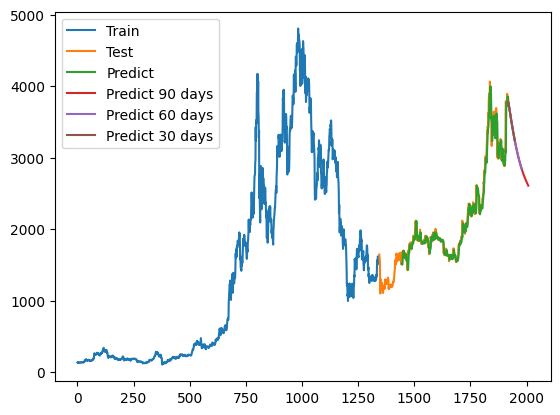

In [36]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 3. BNB/USD Dataset (Data split 7:3)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [59]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [60]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [61]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [62]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [63]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [64]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [65]:
model = Sequential()
model.add(GRU(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 23ms/step - loss: 0.0384
Epoch 2/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0044
Epoch 3/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0014
Epoch 4/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0010
Epoch 5/100
20/20 [==============================] - 0s 23ms/step - loss: 9.8846e-04
Epoch 6/100
20/20 [==============================] - 0s 22ms/step - loss: 9.4614e-04
Epoch 7/100
20/20 [==============================] - 0s 23ms/step - loss: 9.1093e-04
Epoch 8/100
20/20 [==============================] - 0s 23ms/step - loss: 8.7906e-04
Epoch 9/100
20/20 [==============================] - 0s 23ms/step - loss: 8.5508e-04
Epoch 10/100
20/20 [==============================] - 0s 22ms/step - loss: 8.1875e-04
Epoch 11/100
20/20 [==============================] - 1s 26ms/step - loss: 8.0430e-04
Epoch 12/100
20/20 [==============================] - 0s 23ms/step - loss: 7.85

In [67]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 6ms/step


In [68]:
y_pred=scaler.inverse_transform(y_pred)

In [69]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 1.8764706411897183
RMSE: 11.49741214007188
MAE: 6.819307552939967


In [71]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

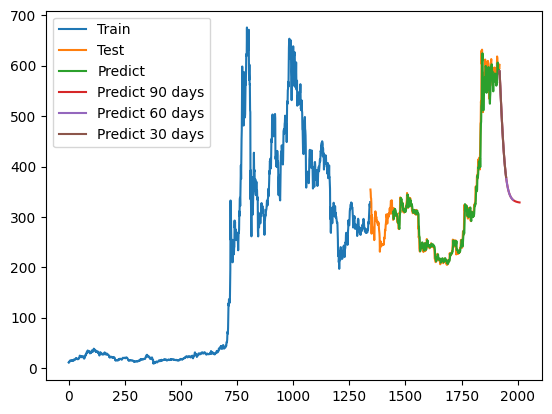

In [72]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 4. BTC/USD Dataset (Data split 8:2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 2s 23ms/step - loss: 0.0992
Epoch 2/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0198
Epoch 3/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0044
Epoch 4/100
23/23 [==============================] - 1s 24ms/step - loss: 8.7873e-04
Epoch 5/100
23/23 [==============================] - 1s 23ms/step - loss: 7.5139e-04
Epoch 6/100
23/23 [==============================] - 1s 23ms/step - loss: 6.9157e-04
Epoch 7/100
23/23 [==============================] - 1s 24ms/step - loss: 6.5549e-04
Epoch 8/100
23/23 [==============================] - 1s 23ms/step - loss: 6.2601e-04
Epoch 9/100
23/23 [==============================] - 1s 23ms/step - loss: 5.9918e-04
Epoch 10/100
23/23 [==============================] - 1s 23ms/step - loss: 5.8152e-04
Epoch 11/100
23/23 [==============================] - 1s 23ms/step - loss: 5.5628e-04
Epoch 12/100
23/23 [==============================] - 1s 23ms/step - loss: 

In [10]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 6ms/step


In [11]:
y_pred=scaler.inverse_transform(y_pred)

In [12]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.3663610616997137
RMSE: 1690.3030518946466
MAE: 1186.0737480675793


In [14]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

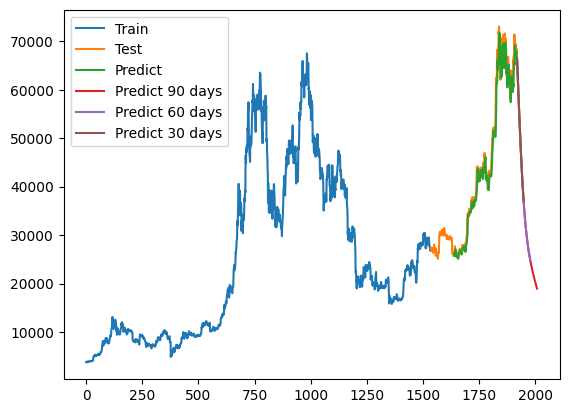

In [15]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 5. ETH/USD Dataset (Data split 8:2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(GRU(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 2s 23ms/step - loss: 0.0428
Epoch 2/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0054
Epoch 3/100
23/23 [==============================] - 1s 23ms/step - loss: 9.7583e-04
Epoch 4/100
23/23 [==============================] - 1s 23ms/step - loss: 7.6085e-04
Epoch 5/100
23/23 [==============================] - 1s 22ms/step - loss: 7.0128e-04
Epoch 6/100
23/23 [==============================] - 1s 23ms/step - loss: 6.6898e-04
Epoch 7/100
23/23 [==============================] - 1s 23ms/step - loss: 6.4044e-04
Epoch 8/100
23/23 [==============================] - 1s 23ms/step - loss: 6.3295e-04
Epoch 9/100
23/23 [==============================] - 1s 23ms/step - loss: 6.2969e-04
Epoch 10/100
23/23 [==============================] - 1s 23ms/step - loss: 5.8656e-04
Epoch 11/100
23/23 [==============================] - 1s 23ms/step - loss: 5.7892e-04
Epoch 12/100
23/23 [==============================] - 1s 23ms/step - lo

In [10]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 6ms/step


In [11]:
y_pred=scaler.inverse_transform(y_pred)

In [12]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.434387786714183
RMSE: 89.1253959912693
MAE: 62.015382981586775


In [14]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

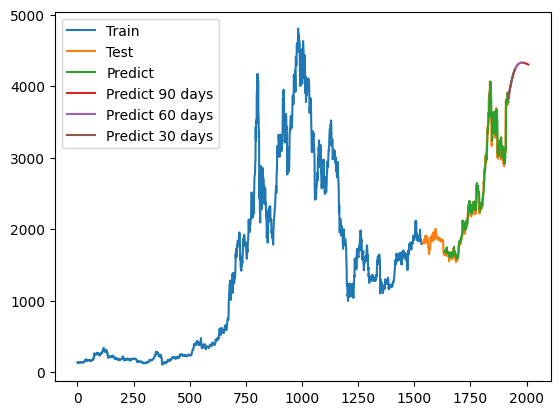

In [15]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 6. BNB/USD Dataset (Data split 8:2)

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [38]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [39]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [40]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [41]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [42]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [43]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:
model = Sequential()
model.add(GRU(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 2s 22ms/step - loss: 0.0579
Epoch 2/100
23/23 [==============================] - 1s 22ms/step - loss: 0.0081
Epoch 3/100
23/23 [==============================] - 1s 22ms/step - loss: 0.0015
Epoch 4/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0011
Epoch 5/100
23/23 [==============================] - 1s 23ms/step - loss: 9.7568e-04
Epoch 6/100
23/23 [==============================] - 1s 22ms/step - loss: 9.4380e-04
Epoch 7/100
23/23 [==============================] - 1s 22ms/step - loss: 8.9854e-04
Epoch 8/100
23/23 [==============================] - 1s 23ms/step - loss: 8.4605e-04
Epoch 9/100
23/23 [==============================] - 1s 23ms/step - loss: 8.2166e-04
Epoch 10/100
23/23 [==============================] - 1s 22ms/step - loss: 7.9770e-04
Epoch 11/100
23/23 [==============================] - 1s 24ms/step - loss: 7.7289e-04
Epoch 12/100
23/23 [==============================] - 1s 23ms/step - loss: 7.44

In [46]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 6ms/step


In [47]:
y_pred=scaler.inverse_transform(y_pred)

In [48]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.008190073075413
RMSE: 13.099864066902159
MAE: 7.813017742035665


In [50]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

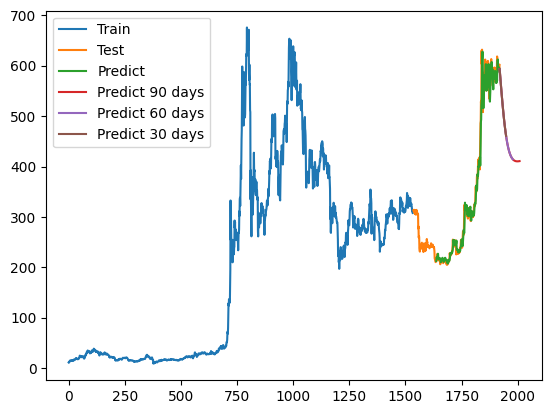

In [52]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 7. BTC/USD Dataset (Data split 9:1)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [54]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [55]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [56]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [57]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [58]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [59]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [60]:
model = Sequential()
model.add(GRU(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [61]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 2s 23ms/step - loss: 0.0432
Epoch 2/100
26/26 [==============================] - 1s 22ms/step - loss: 0.0056
Epoch 3/100
26/26 [==============================] - 1s 22ms/step - loss: 0.0011
Epoch 4/100
26/26 [==============================] - 1s 23ms/step - loss: 5.8958e-04
Epoch 5/100
26/26 [==============================] - 1s 22ms/step - loss: 5.6633e-04
Epoch 6/100
26/26 [==============================] - 1s 23ms/step - loss: 5.2628e-04
Epoch 7/100
26/26 [==============================] - 1s 22ms/step - loss: 4.9443e-04
Epoch 8/100
26/26 [==============================] - 1s 22ms/step - loss: 4.8187e-04
Epoch 9/100
26/26 [==============================] - 1s 22ms/step - loss: 4.5823e-04
Epoch 10/100
26/26 [==============================] - 1s 22ms/step - loss: 4.4281e-04
Epoch 11/100
26/26 [==============================] - 1s 22ms/step - loss: 4.3079e-04
Epoch 12/100
26/26 [==============================] - 1s 24ms/step - loss: 

In [62]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 7ms/step


In [63]:
y_pred=scaler.inverse_transform(y_pred)

In [64]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.4803031929914776
RMSE: 2164.769975071784
MAE: 1645.2237208104395


In [66]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

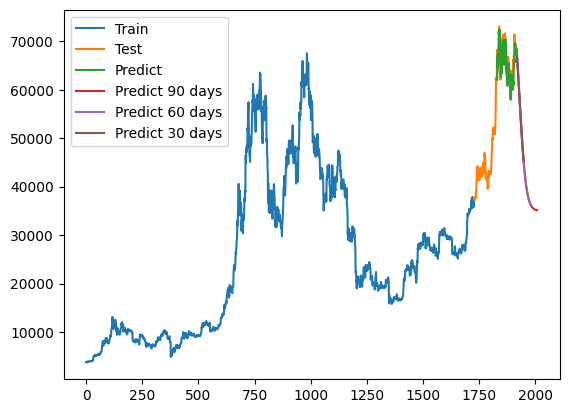

In [67]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 8. ETH/USD Dataset (Data split 9:1)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [69]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [70]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [71]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [72]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [73]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [74]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [75]:
model = Sequential()
model.add(GRU(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 2s 23ms/step - loss: 0.0315
Epoch 2/100
26/26 [==============================] - 1s 23ms/step - loss: 0.0029
Epoch 3/100
26/26 [==============================] - 1s 22ms/step - loss: 7.5469e-04
Epoch 4/100
26/26 [==============================] - 1s 22ms/step - loss: 6.6288e-04
Epoch 5/100
26/26 [==============================] - 1s 22ms/step - loss: 6.2515e-04
Epoch 6/100
26/26 [==============================] - 1s 24ms/step - loss: 5.9519e-04
Epoch 7/100
26/26 [==============================] - 1s 24ms/step - loss: 5.7339e-04
Epoch 8/100
26/26 [==============================] - 1s 23ms/step - loss: 5.5797e-04
Epoch 9/100
26/26 [==============================] - 1s 23ms/step - loss: 5.4411e-04
Epoch 10/100
26/26 [==============================] - 1s 26ms/step - loss: 5.2830e-04
Epoch 11/100
26/26 [==============================] - 1s 25ms/step - loss: 5.1067e-04
Epoch 12/100
26/26 [==============================] - 1s 25ms/step - lo

In [77]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 7ms/step


In [78]:
y_pred=scaler.inverse_transform(y_pred)

In [79]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 3.1566108909172543
RMSE: 145.64945642482684
MAE: 107.97116672390108


In [81]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

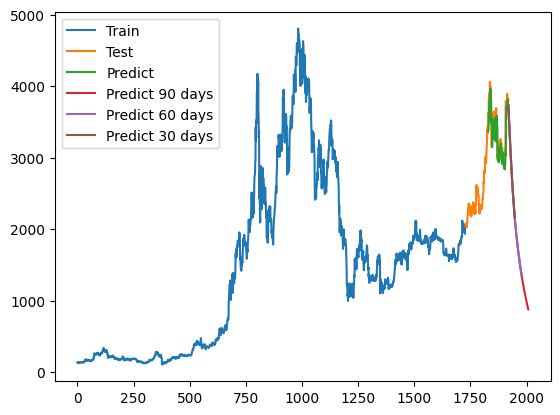

In [82]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 9. BNB/USD Dataset (Data split 9:1)

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [84]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [85]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [86]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [87]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [88]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [89]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [90]:
model = Sequential()
model.add(GRU(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [91]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 2s 23ms/step - loss: 0.0501
Epoch 2/100
26/26 [==============================] - 1s 22ms/step - loss: 0.0056
Epoch 3/100
26/26 [==============================] - 1s 23ms/step - loss: 0.0010
Epoch 4/100
26/26 [==============================] - 1s 23ms/step - loss: 8.5417e-04
Epoch 5/100
26/26 [==============================] - 1s 22ms/step - loss: 7.9454e-04
Epoch 6/100
26/26 [==============================] - 1s 22ms/step - loss: 7.5546e-04
Epoch 7/100
26/26 [==============================] - 1s 23ms/step - loss: 7.2579e-04
Epoch 8/100
26/26 [==============================] - 1s 24ms/step - loss: 7.0791e-04
Epoch 9/100
26/26 [==============================] - 1s 24ms/step - loss: 6.7013e-04
Epoch 10/100
26/26 [==============================] - 1s 25ms/step - loss: 6.3946e-04
Epoch 11/100
26/26 [==============================] - 1s 24ms/step - loss: 6.3939e-04
Epoch 12/100
26/26 [==============================] - 1s 24ms/step - loss: 

In [92]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 7ms/step


In [93]:
y_pred=scaler.inverse_transform(y_pred)

In [94]:
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 2.5612413544627044
RMSE: 20.904255314908564
MAE: 14.388335712139419


In [96]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

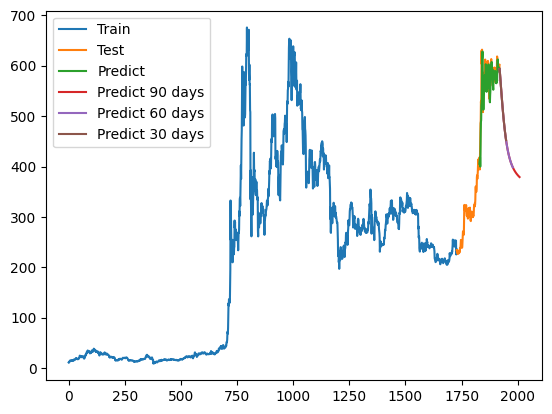

In [97]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()